In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
import string

## Pobieranie danych

In [35]:
df_noun = pd.read_excel('cyberbullying_train_words_noun.xlsx')

In [36]:
df_text = pd.read_excel('cyberbullying_train_complete_sentences.xlsx', sheet_name='Superanotator')

In [37]:
df_noun = df_noun[['nouns', 'SUPERanotator']][:601]
df_noun.columns = ['nouns', 'labels']

df_text = df_text[['text', 'LABEL']][:601]
df_text.columns = ['text', 'labels']

In [66]:
def clean_text(text):
    text = re.sub(r'@anonymized_account', '', text)
    text = re.sub(r'RT', '', text)
    return text

In [68]:
df_text['text'] = df_text['text'].apply(clean_text)

## Sentences

### Liczba tekstów w zbiorze

In [69]:
text_shape = df_text.shape[0]
print(f"Liczba tesktów w zbiorze: {text_shape}")

Liczba tesktów w zbiorze: 601


### Liczba słów w zbiorze

Statystyki dla liczby słów w kolumnie 'text':
Średnia liczba słów: 10.98
Minimalna liczba słów: 1.0
Maksymalna liczba słów: 26.0


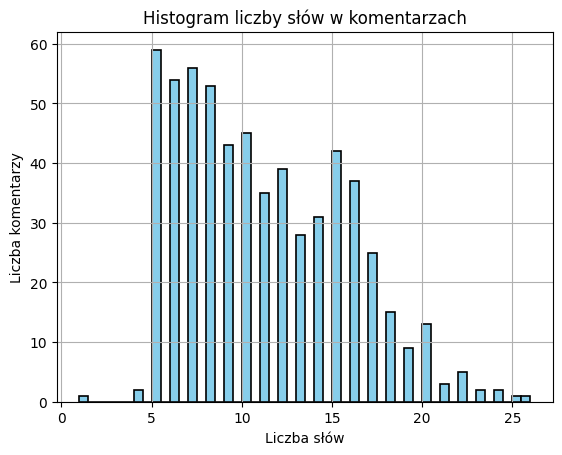

In [70]:
df_text['word_count'] = df_text['text'].apply(lambda x: len(x.split()))

word_count_stats = df_text['word_count'].describe()

print("Statystyki dla liczby słów w kolumnie 'text':")
print(f"Średnia liczba słów: {word_count_stats['mean']:.2f}")
print(f"Minimalna liczba słów: {word_count_stats['min']}")
print(f"Maksymalna liczba słów: {word_count_stats['max']}")

df_text['word_count'].hist(bins=50, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Histogram liczby słów w komentarzach')
plt.ylabel('Liczba komentarzy')
plt.xlabel('Liczba słów')
plt.show()


### Liczba znaków w zbiorze

Statystyki dla liczby znaków w kolumnie 'text':
Średnia liczba znaków: 67.67
Minimalna liczba znaków: 6.0
Maksymalna liczba znaków: 140.0


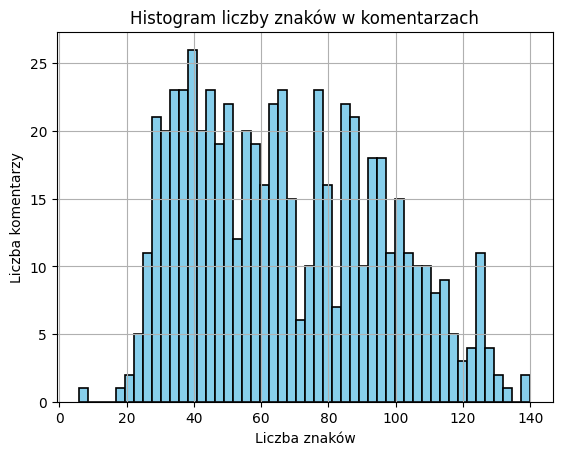

In [71]:
df_text['char_count'] = df_text['text'].apply(lambda x: len(x))

char_count_stats = df_text['char_count'].describe()

print("Statystyki dla liczby znaków w kolumnie 'text':")
print(f"Średnia liczba znaków: {char_count_stats['mean']:.2f}")
print(f"Minimalna liczba znaków: {char_count_stats['min']}")
print(f"Maksymalna liczba znaków: {char_count_stats['max']}")

df_text['char_count'].hist(bins=50, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Histogram liczby znaków w komentarzach')
plt.xlabel('Liczba znaków')
plt.ylabel('Liczba komentarzy')
plt.show()

### Częstość występowania etykiet

Rozkład etykiet w kolumnie 'labels':
labels
0.0    444
1.0    155
Name: count, dtype: int64


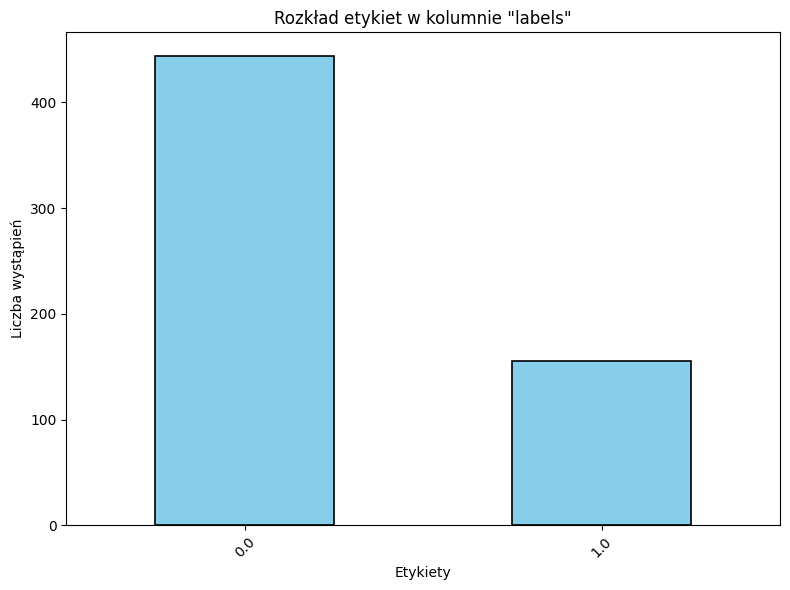

In [72]:
label_text_distribution = df_text['labels'].value_counts()

print("Rozkład etykiet w kolumnie 'labels':")
print(label_text_distribution)

plt.figure(figsize=(8, 6))
label_text_distribution.plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Rozkład etykiet w kolumnie "labels"')
plt.xlabel('Etykiety')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Najczęściej występujące słowa dla każdej etykiety

In [78]:
def get_n_top_words(text, n=10):
    all_words = ' '.join(text).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

def remove_stopwords(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in string.punctuation]
    return ' '.join(filtered_words)

In [84]:
def get_stop_words():
    with open('stopwords.txt', 'r', encoding="utf-8") as file:
        stop_words = file.readlines()
        stop_set = set(m.strip() for m in stop_words)
        return list(frozenset(stop_set))

['hab', 'iii', 'wam', 'tzw', 'dobrze', 'czasem', 'ten', 'za', 'lat', 'jeśli', 'twym', 'miał', 'także', 'zł', 'nią', 'które', 'tobie', 'często', 'mu', 'wami', 'tel', 'bowiem', 'żeby', 'kilka', 'było', 'ciebie', 'dwie', 'jakkolwiek', 'jeå¼eli', 'inna', 'o.o.', 'albo', 'wszystkich', 'zawsze', 'tam', 'naszych', 'gdziekolwiek', 'takie', 'były', 'inny', 'naszego', 'dr', 'gdyż', 'czyli', 'jakoś', 'mam', 'www', 'aż', 'tu', 'przy', 'bez', 'pana', 'xi', 'no', 'taka', 'według', 'duå¼o', 'jä…', 'nich', 'podczas', 'niech', 'swoje', 'pod', 'aj', 'wszystkim', 'będzie', 'zapewne', 'wielu', 'sam', 'którym', 'ktokolwiek', 'więc', 'został', 'temu', 'wszystko', 'na', 'twoja', 'nasza', 'był', 'ponad', 'oraz', 'wy', 'tej', 'wasi', 'tym', 'ale', 'ją', 'tys', 'ależ', 'czemu', 'moje', 'oto', 'twoi', 'nas', 'xiii', 'to', 'żaden', 'między', 'dziś', 'żadne', 'wie', 'dla', 'wśród', 'którego', 'jako', 'totobą', 'mało', 'do', 'mają', 'jeå›li', 'bym', 'sama', 'iv', 'po', 'powinno', 'ani', 'tak', 'kaå¼dy', 'kierunku',

In [88]:
import demoji


def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " ")

    return string

In [100]:
labels_text = df_text['labels'].unique()
labels_text = [label for label in labels_text if str(label) != 'nan']
top_words_by_label = {}

stop_words = get_stop_words()

df_text['text_clean'] = df_text['text'].apply(lambda x: remove_stopwords(x, stop_words))
df_text['text_clean'] = df_text['text_clean'].apply(handle_emoji)

for label in labels_text:
    text = df_text[df_text['labels'] == label]['text_clean']
    top_words_by_label[label] = get_n_top_words(text)
    
for label, top_words in top_words_by_label.items():
    print(f"\nNajczęściej występujące słowa dla etykiety '{label}':")
    for word, count in top_words:
        print(f"{word}: {count}")


Najczęściej występujące słowa dla etykiety '0.0':
meczu: 8
chyba: 8
pewnie: 8
Wisły: 6
czym: 5
wiem: 5
dzień: 5
jadą: 5
ten,: 5
zaraz: 5

Najczęściej występujące słowa dla etykiety '1.0':
masz: 8
jesteś: 5
tacy: 5
kurwa: 3
Koń: 3
cha,: 3
L: 3
siebie: 3
Polskę: 3
potem: 2


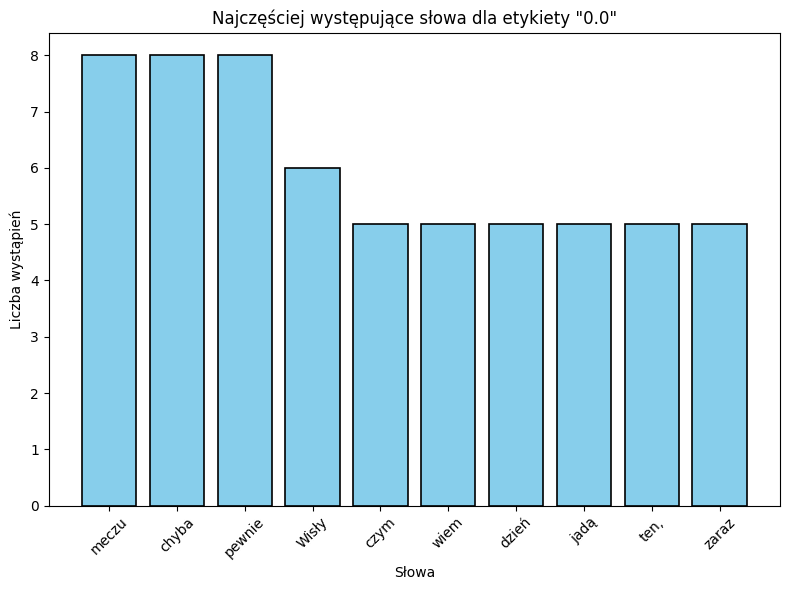

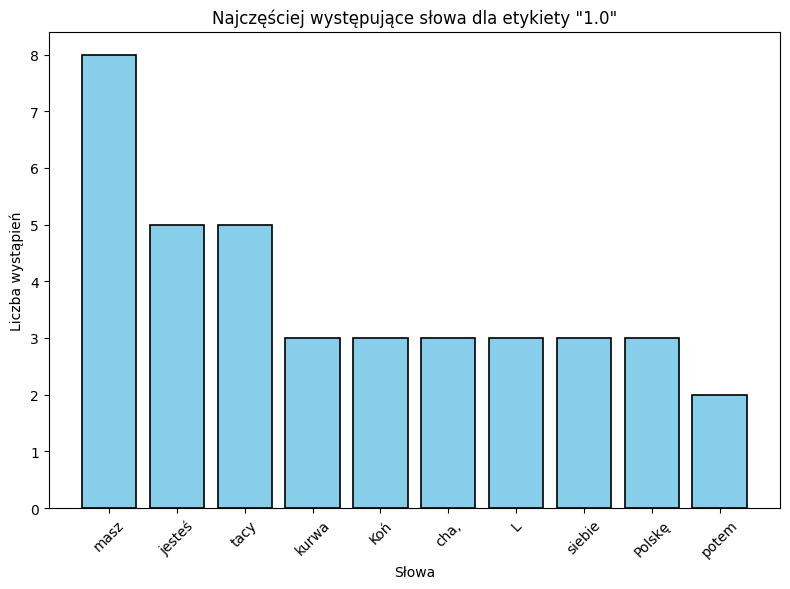

In [103]:
for label, top_words in top_words_by_label.items():
    words, counts = zip(*top_words)  # Rozpakuj słowa i ich liczniki
    plt.figure(figsize=(8, 6))
    plt.bar(words, counts, color='skyblue', edgecolor='black', linewidth=1.2)
    plt.title(f'Najczęściej występujące słowa dla etykiety "{label}"')
    plt.xlabel('Słowa')
    plt.ylabel('Liczba wystąpień')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Nouns

### Liczba rzeczowników w zbiorze

In [39]:
noun_size = df_noun.shape[0]
print(f"Liczba rzeczowników w zbiorze: {noun_size}")

Liczba rzeczowników w zbiorze: 601


### Liczba znaków w zbiorze

Statystyki dla liczby znaków w kolumnie 'nouns':
Średnia liczba znaków: 6.94
Minimalna liczba znaków: 1.0
Maksymalna liczba znaków: 18.0


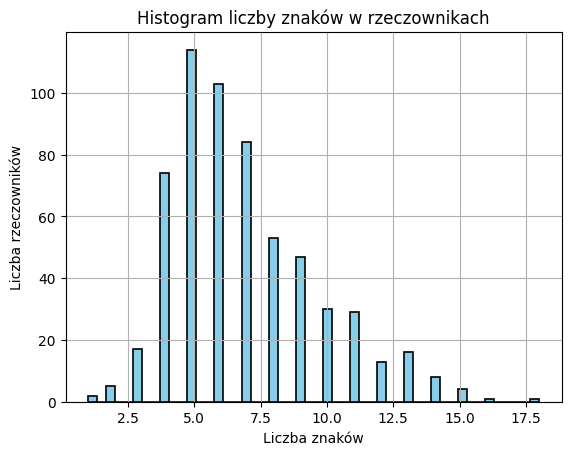

In [60]:
df_noun['char_count'] = df_noun['nouns'].apply(lambda x: len(x))

char_count_stats = df_noun['char_count'].describe()

print("Statystyki dla liczby znaków w kolumnie 'nouns':")
print(f"Średnia liczba znaków: {char_count_stats['mean']:.2f}")
print(f"Minimalna liczba znaków: {char_count_stats['min']}")
print(f"Maksymalna liczba znaków: {char_count_stats['max']}")

df_noun['char_count'].hist(bins=50, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Histogram liczby znaków w rzeczownikach')
plt.xlabel('Liczba znaków')
plt.ylabel('Liczba rzeczowników')
plt.show()

### Częstość wystęowania etykiet

Rozkład etykiet w kolumnie 'labels':
labels
2.0    346
0.0    113
1.0    112
3.0     29
Name: count, dtype: int64


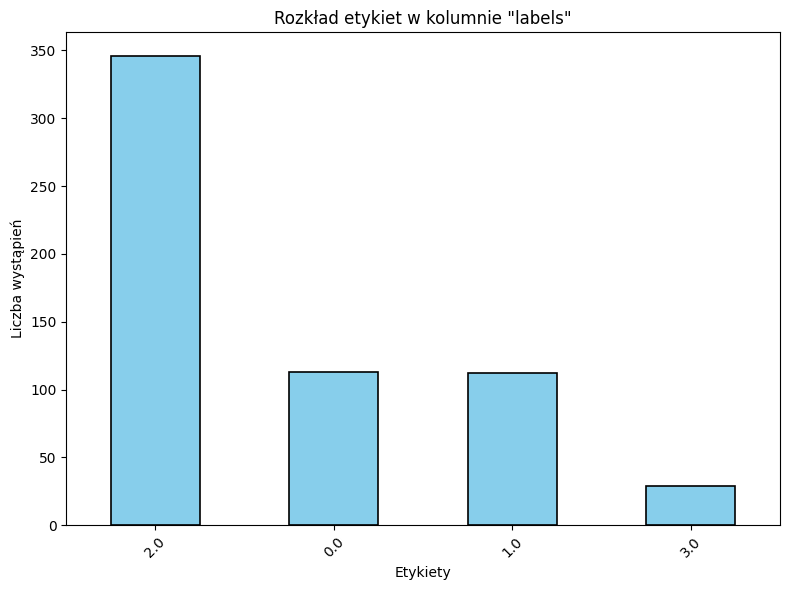

In [61]:
label_noun_distribution = df_noun['labels'].value_counts()

print("Rozkład etykiet w kolumnie 'labels':")
print(label_noun_distribution)

plt.figure(figsize=(8, 6))
label_noun_distribution.plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Rozkład etykiet w kolumnie "labels"')
plt.xlabel('Etykiety')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Najczęściej występujące słowa dla każdej etykiety

In [101]:
labels_noun = df_noun['labels'].unique()
labels_noun = [label for label in labels_noun if str(label) != 'nan']

top_nouns_by_label = {}

df_noun['nouns_clean'] = df_noun['nouns'].apply(lambda x: remove_stopwords(x, stop_words))


for label in labels_noun:
    nouns = df_noun[df_noun['labels'] == label]['nouns']
    top_nouns_by_label[label] = get_n_top_words(nouns)
    
for label, top_nouns in top_nouns_by_label.items():
    print(f"\nNajczęściej występujące rzeczowniki dla etykiety '{label}':")
    for noun, count in top_nouns:
        print(f"{noun}: {count}")


Najczęściej występujące rzeczowniki dla etykiety '0.0':
Pani: 3
Patryk: 2
Prezes: 2
Pana: 2
poseł: 2
ludzi: 2
kibice: 2
Ja: 2
LUDZIE: 1
gnojki: 1

Najczęściej występujące rzeczowniki dla etykiety '1.0':
szklo: 2
kasy: 2
głowy: 2
nogi: 2
RESTAURACJA: 1
kurtkę: 1
ławce: 1
bramke: 1
taksówki: 1
rzeczy: 1

Najczęściej występujące rzeczowniki dla etykiety '2.0':
razie: 4
końcu: 3
raz: 3
mecz: 3
końca: 3
wybory: 2
razu: 2
maja: 2
wsparcie: 2
parcie: 2

Najczęściej występujące rzeczowniki dla etykiety '3.0':
pisdzielstwo: 2
#: 2
świat: 1
znaki: 1
znak: 1
świecie: 1
ehh: 1
Papadopoulosa: 1
Ej: 1
homopisuarowiec: 1


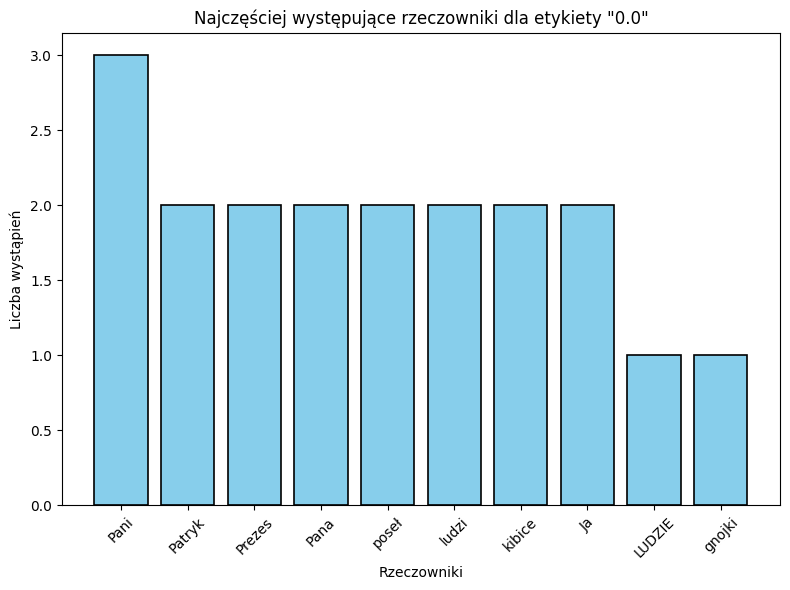

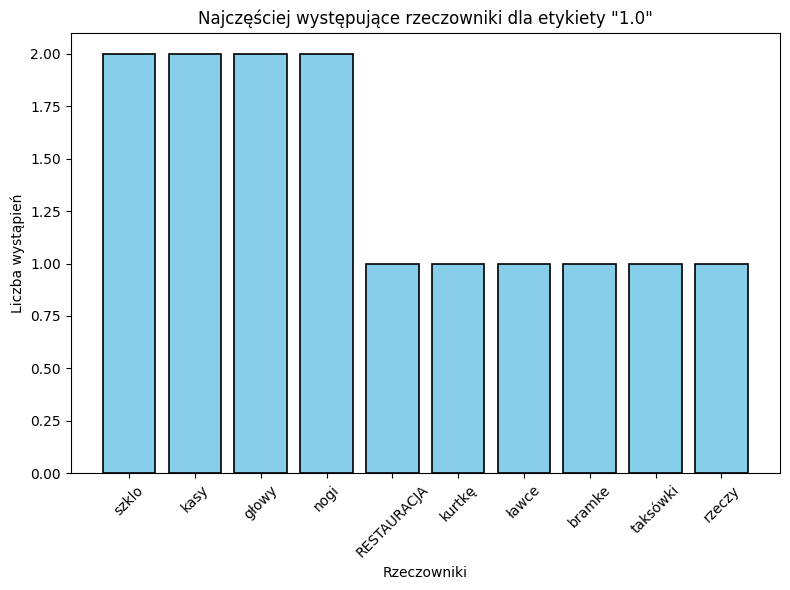

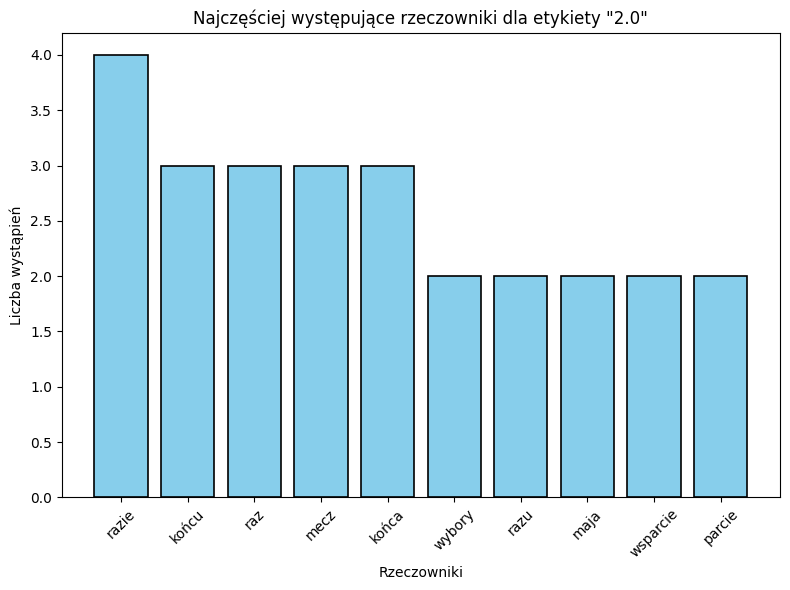

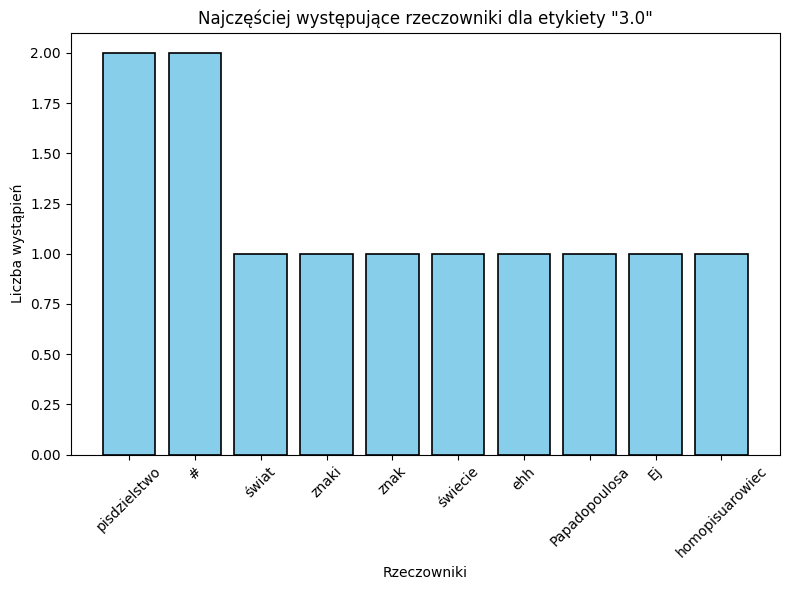

In [104]:
for label, top_nouns in top_nouns_by_label.items():
    nouns, counts = zip(*top_nouns) 
    plt.figure(figsize=(8, 6))
    plt.bar(nouns, counts, color='skyblue', edgecolor='black', linewidth=1.2)
    plt.title(f'Najczęściej występujące rzeczowniki dla etykiety "{label}"')
    plt.xlabel('Rzeczowniki')
    plt.ylabel('Liczba wystąpień')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()